In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [27]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
session.query(measurement).order_by(measurement.date.desc()).first().__dict__['date']

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

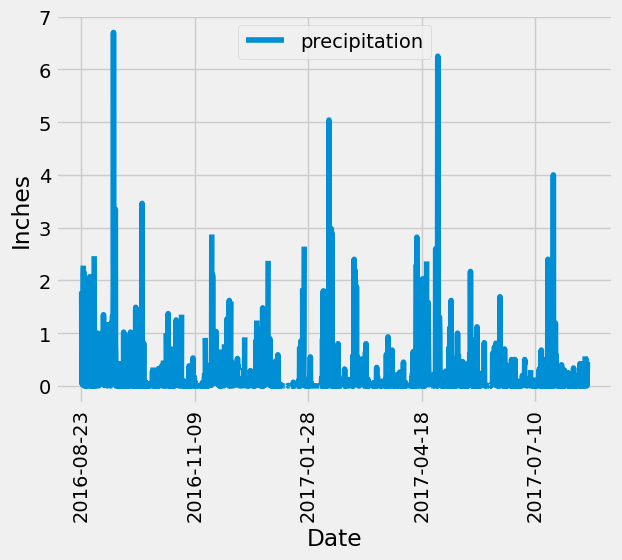

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
last_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
res = session.query(measurement).filter(measurement.date >= last_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = {'date': [], 'precipitation': []}
for x in res:
  data['date'].append(x.date)
  data['precipitation'].append(x.prcp)
df = pd.DataFrame(data)

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'precipitation', rot=90, xlabel='Date', ylabel='Inches')

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).distinct().count()

9

In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)) \
  .group_by(measurement.station) \
  .order_by(func.count(measurement.station).desc()) \
  .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)) \
  .filter(measurement.station == 'USC00519281') \
  .all()

[(54.0, 85.0, 71.66378066378067)]

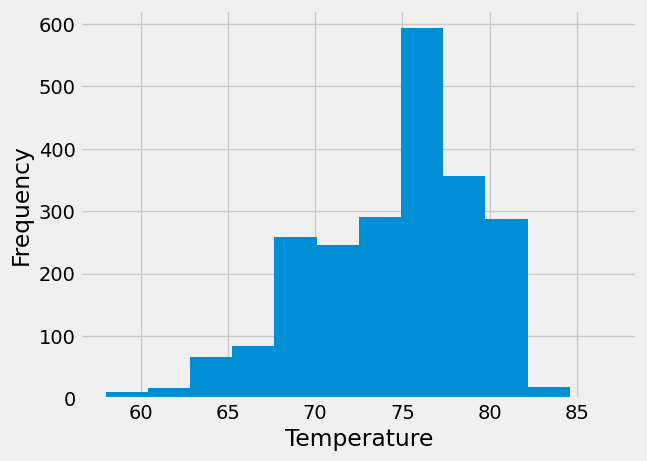

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
res = session.query(measurement).filter(measurement.date >= last_year_date).all()
df = pd.DataFrame({'tobs': [x.tobs for x in res]})
df['tobs'].plot(xlabel='Temperature', ylabel='Frequency', kind='hist', bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [39]:
# Close Session
session.close()